In [1]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.animation as ani
from matplotlib import pyplot
import random
from matplotlib import lines

from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count
import seaborn


### Census.gov API Call

In [2]:
response = None
url1 = 'https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=state:*'
url2 ='https://api.census.gov/data/timeseries/poverty/saipe?get=SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=us'

url3 = 'https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=county:*'

poverty_response1 = requests.get(url1)
poverty_response2 = requests.get(url2)
poverty_response3 = requests.get(url3)

Convert our api response to json

In [3]:
poverty_response_json1 = poverty_response1.json()
poverty_response_json2 = poverty_response2.json()
poverty_response_json3 = poverty_response3.json()

load Poverty Data in DF

In [4]:
poverty_state = pd.DataFrame(poverty_response_json1[1:], columns=poverty_response_json1[0])
poverty_nat = pd.DataFrame(poverty_response_json2[1:], columns=poverty_response_json2[0])
poverty_county = pd.DataFrame(poverty_response_json3[1:], columns=poverty_response_json3[0])

In [5]:
poverty_county.head(5).shape
poverty_county

,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,state,county
0,Autauga County,14.3,20.2,26898,1989,01,001
1,Baldwin County,13.2,18.6,24043,1989,01,003
2,Barbour County,26.2,38.2,18673,1989,01,005
3,Bibb County,18.9,25.0,19604,1989,01,007
4,Blount County,13.4,19.4,24035,1989,01,009
...,...,...,...,...,...,...,...
91108,Sweetwater County,9.2,9.7,74677,2021,56,037
91109,Teton County,5.9,5.5,102709,2021,56,039
91110,Uinta County,9.4,11.2,70162,2021,56,041
91111,Washakie County,10.2,12.5,62176,2021,56,043


In [6]:
poverty_state.head(5)

,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,state
0,Alabama,17.7,24.1,22202,1989,01
1,Alaska,10.6,15.4,33885,1989,02
2,Arizona,14.7,23.3,28924,1989,04
3,Arkansas,17.9,24.4,20729,1989,05
4,California,12.7,21.3,33474,1989,06


In [7]:
state_name_df = poverty_state[['NAME','state']]



In [8]:
state_name_df.rename(columns={'NAME': "STATE_NAME"}, inplace=True)

C:\Users\kendr\AppData\Local\Temp\ipykernel_36064\1187030159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_name_df.rename(columns={'NAME': "STATE_NAME"}, inplace=True)


In [9]:
state_name_df.head(5)

,STATE_NAME,state
0,Alabama,01
1,Alaska,02
2,Arizona,04
3,Arkansas,05
4,California,06


In [10]:
poverty_county_state = state_name_df.merge(poverty_county, on='state')

In [11]:
poverty_county_state.shape
poverty_county_state.drop_duplicates()

,STATE_NAME,state,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,county
0,Alabama,01,Autauga County,14.3,20.2,26898,1989,001
1,Alabama,01,Baldwin County,13.2,18.6,24043,1989,003
2,Alabama,01,Barbour County,26.2,38.2,18673,1989,005
3,Alabama,01,Bibb County,18.9,25.0,19604,1989,007
4,Alabama,01,Blount County,13.4,19.4,24035,1989,009
...,...,...,...,...,...,...,...,...
2623596,Wyoming,56,Sweetwater County,9.2,9.7,74677,2021,037
2623597,Wyoming,56,Teton County,5.9,5.5,102709,2021,039
2623598,Wyoming,56,Uinta County,9.4,11.2,70162,2021,041
2623599,Wyoming,56,Washakie County,10.2,12.5,62176,2021,043


In [12]:
poverty_state = poverty_state.drop(columns='state')
poverty_nat = poverty_nat.drop(columns='us')
poverty_county_state = poverty_county_state.drop(columns='state')

poverty_county_state = poverty_county_state.drop(columns='county')

poverty_state = poverty_state.rename(columns={"NAME": "STATE", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })
poverty_nat = poverty_nat.rename(columns={"NAME": "STATE", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })

poverty_county_state = poverty_county_state.rename(columns={"NAME": "COUNTY", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })

In [13]:
poverty_state = poverty_state.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})
poverty_nat = poverty_nat.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})
poverty_county_state = poverty_county_state.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})

In [14]:
print(poverty_state.dtypes)
print(poverty_nat.dtypes)
print(poverty_county_state.dtypes)

STATE             object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object
STATE_NAME        object
COUNTY            object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object


In [15]:
poverty_nat = poverty_nat[poverty_nat['YEAR'] >= 2017]
poverty_state = poverty_state[poverty_state['YEAR'] >= 2017]

county_df = poverty_county_state[poverty_county_state['YEAR'] >= 2017]

In [16]:
poverty_state = poverty_state[poverty_state['STATE'] != 'Guam'] 
poverty_state = poverty_state[poverty_state['STATE'] != 'Puerto Rico'] 
poverty_state = poverty_state[poverty_state['STATE'] != 'Virgin Islands']
poverty_state = poverty_state[poverty_state['STATE'] != 'District of Columbia']

## Graphs for County Poverty

In [17]:
minnesota = county_df[county_df['STATE_NAME'] == 'Minnesota']
hennepin = minnesota[minnesota['COUNTY'] == 'Hennepin County']

In [18]:
hennepin = hennepin.drop_duplicates()

array([[<AxesSubplot:title={'center':'PR_ALL'}>,
        <AxesSubplot:title={'center':'PR_YOUTH'}>],
       [<AxesSubplot:title={'center':'MED_HH_INCOME'}>,
        <AxesSubplot:title={'center':'YEAR'}>]], dtype=object)

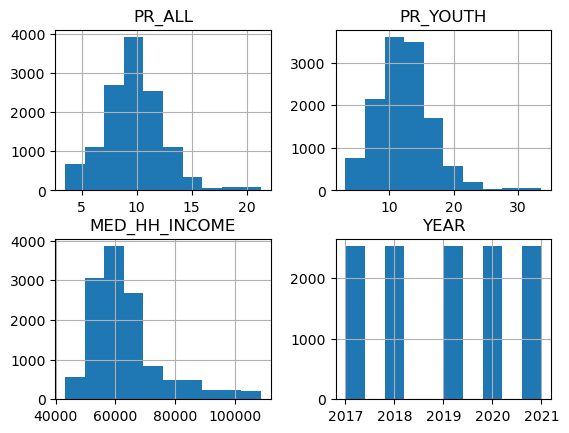

In [19]:
minnesota.hist(bins=10)

<AxesSubplot:xlabel='PR_ALL', ylabel='MED_HH_INCOME'>

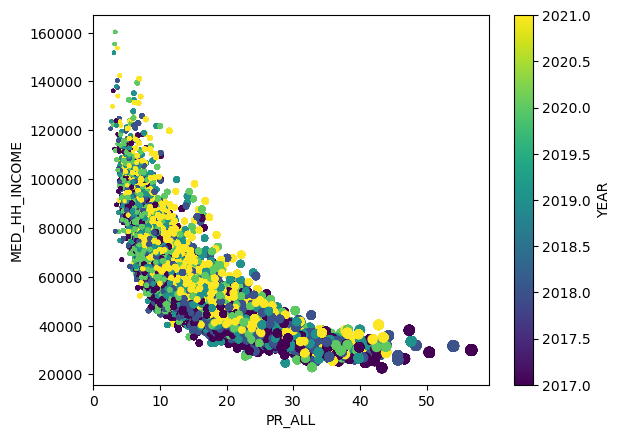

In [20]:
ax1 = county_df.plot.scatter(y='MED_HH_INCOME', x='PR_ALL', c='YEAR', colormap='viridis', s=county_df['PR_ALL'])
ax1

<AxesSubplot:xlabel='PR_ALL', ylabel='MED_HH_INCOME'>

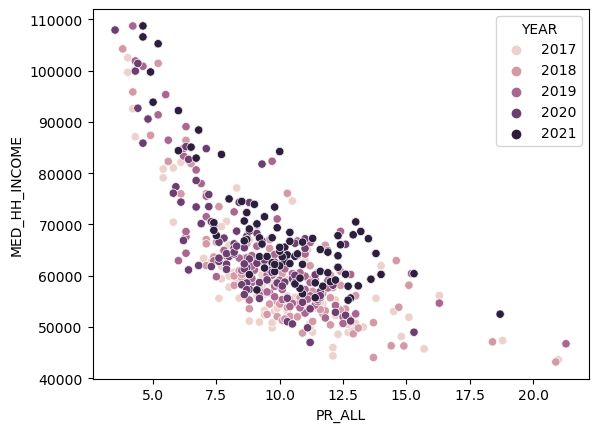

In [21]:
seaborn.scatterplot(data=minnesota, x='PR_ALL', y='MED_HH_INCOME', hue='YEAR')

<AxesSubplot:xlabel='YEAR', ylabel='MED_HH_INCOME'>

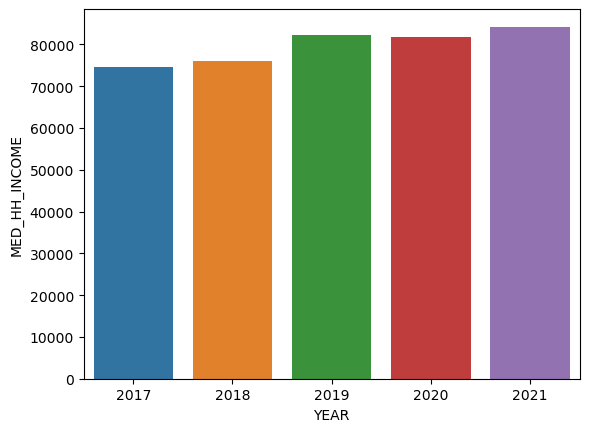

In [22]:
seaborn.barplot(x='YEAR', y='MED_HH_INCOME', data = hennepin)


<AxesSubplot:xlabel='YEAR', ylabel='PR_ALL'>

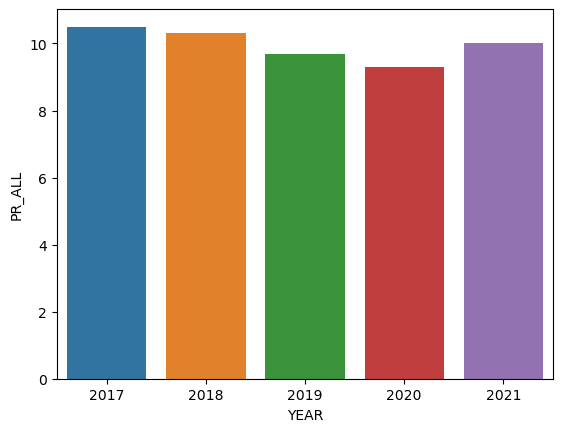

In [23]:
seaborn.barplot(x='YEAR', y='PR_ALL', data = hennepin)

# National salary data

In [24]:

national2017_df = pd.read_excel("../data/national_M2017_dl.xlsx")
national2018_df = pd.read_excel("../data/national_M2018_dl.xlsx")
national2019_df = pd.read_excel("../data/national_M2019_dl.xlsx")
national2020_df = pd.read_excel("../data/national_M2020_dl.xlsx")
national2021_df = pd.read_excel("../data/national_M2021_dl.xlsx")
national2017_df['Year'] = 2017
national2018_df['Year'] = 2018
national2019_df['Year'] = 2019
national2020_df['Year'] = 2020
national2021_df['Year'] = 2021

Add Year columns to data

Reusable function to change column names to upper

In [25]:
def upper_columns(data):
    columns = data
    myList = []
    for name in columns:
        myList.append(name.upper())
    data.columns = myList

In [26]:
upper_columns(national2017_df)
upper_columns(national2018_df)
upper_columns(national2019_df)
upper_columns(national2020_df)
upper_columns(national2021_df)

Rename columns that dont match

In [27]:
national2019_df = national2019_df.rename(columns={'O_GROUP': 'OCC_GROUP'})
national2020_df = national2020_df.rename(columns={'O_GROUP': 'OCC_GROUP'})
national2021_df = national2021_df.rename(columns={'O_GROUP': 'OCC_GROUP'})

Filter columns and set correct column order

In [28]:
national2017_ordered = national2017_df[[
    'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'H_MEAN',
    'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75',
    'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90',
    'YEAR']]
national2018_ordered = national2018_df[[
    'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'H_MEAN',
    'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75',
    'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90',
    'YEAR']]
national2019_ordered = national2019_df[[
    'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'H_MEAN',
    'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75',
    'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90',
    'YEAR']]
national2020_ordered = national2020_df[[
    'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'H_MEAN',
    'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75',
    'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90',
    'YEAR']]
national2021_ordered = national2021_df[[
    'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'H_MEAN',
    'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75',
    'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90',
    'YEAR']]

Concat all National data into one df

In [29]:
national_df = pd.concat([national2017_ordered, national2018_ordered, national2019_ordered, national2020_ordered, national2021_ordered], axis=0)
national_df.shape
national_df

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,YEAR
0,00-0000,All Occupations,total,142549250,0.1,24.34,50620,0.1,9.6,11.91,18.12,29.38,46.23,19970,24770,37690,61110,96150,2017
1,11-0000,Management Occupations,major,7280330,0.2,57.65,119910,0.1,23.19,33.6,49.32,71.83,#,48220,69880,102590,149410,#,2017
2,11-1000,Top Executives,minor,2473740,0.3,61.55,128020,0.2,20.74,31.74,49.58,78.72,#,43140,66030,103120,163740,#,2017
3,11-1010,Chief Executives,broad,210160,0.7,94.25,196050,0.4,32.74,54.55,88.11,#,#,68110,113470,183270,#,#,2017
4,11-1011,Chief Executives,detailed,210160,0.7,94.25,196050,0.4,32.74,54.55,88.11,#,#,68110,113470,183270,#,#,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,53-7081,Refuse and Recyclable Material Collectors,detailed,126050,1.5,20.57,42780,0.7,11.99,14.56,18.51,23.5,29.96,24950,30270,38500,48870,62310,2021
1399,53-7120,"Tank Car, Truck, and Ship Loaders",broad,12090,6.8,26.6,55330,2.6,15.91,18.54,23.75,37.31,38.39,33090,38570,49390,77610,79860,2021
1400,53-7121,"Tank Car, Truck, and Ship Loaders",detailed,12090,6.8,26.6,55330,2.6,15.91,18.54,23.75,37.31,38.39,33090,38570,49390,77610,79860,2021
1401,53-7190,Miscellaneous Material Moving Workers,broad,22470,4.7,19.32,40190,1.8,13.68,14.4,17.38,22.78,29.24,28450,29960,36150,47380,60830,2021


In [30]:
national_df = national_df[[
    'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'H_MEAN',
    'A_MEAN', 'H_MEDIAN', 'A_MEDIAN', 'YEAR']]
national_df

,OCC_TITLE,OCC_GROUP,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,YEAR
0,All Occupations,total,142549250,24.34,50620,18.12,37690,2017
1,Management Occupations,major,7280330,57.65,119910,49.32,102590,2017
2,Top Executives,minor,2473740,61.55,128020,49.58,103120,2017
3,Chief Executives,broad,210160,94.25,196050,88.11,183270,2017
4,Chief Executives,detailed,210160,94.25,196050,88.11,183270,2017
...,...,...,...,...,...,...,...,...
1398,Refuse and Recyclable Material Collectors,detailed,126050,20.57,42780,18.51,38500,2021
1399,"Tank Car, Truck, and Ship Loaders",broad,12090,26.6,55330,23.75,49390,2021
1400,"Tank Car, Truck, and Ship Loaders",detailed,12090,26.6,55330,23.75,49390,2021
1401,Miscellaneous Material Moving Workers,broad,22470,19.32,40190,17.38,36150,2021


# State salary data

Read in state salary data from excel

In [31]:
state1997_df = pd.read_excel("../data/state_M1997_dl.xls")
state1998_df = pd.read_excel("../data/state_M1998_dl.xls")
state1999_df = pd.read_excel("../data/state_M1999_dl.xls")
state2000_df = pd.read_excel("../data/state_M2000_dl.xls")
state2001_df = pd.read_excel("../data/state_M2001_dl.xls")
state2002_df = pd.read_excel("../data/state_M2002_dl.xls")
state2003_df = pd.read_excel("../data/state_M2003_dl.xls")
state2004_df = pd.read_excel("../data/state_M2004_dl.xls")
state2005_df = pd.read_excel("../data/state_M2005_dl.xls")
state2006_df = pd.read_excel("../data/state_M2006_dl.xls")
state2007_df = pd.read_excel("../data/state_M2007_dl.xls")
state2008_df = pd.read_excel("../data/state_M2008_dl.xls")
state2009_df = pd.read_excel("../data/state_M2009_dl.xls")
state2010_df = pd.read_excel("../data/state_M2010_dl.xls")
state2011_df = pd.read_excel("../data/state_M2011_dl.xls")
state2012_df = pd.read_excel("../data/state_M2012_dl.xls")
state2013_df = pd.read_excel("../data/state_M2013_dl.xls")
state2014_df = pd.read_excel("../data/state_M2014_dl.xlsx")
state2015_df = pd.read_excel("../data/state_M2015_dl.xlsx")
state2016_df = pd.read_excel("../data/state_M2016_dl.xlsx")
state2017_df = pd.read_excel("../data/state_M2017_dl.xlsx")
state2018_df = pd.read_excel("../data/state_M2018_dl.xlsx")
state2019_df = pd.read_excel("../data/state_M2019_dl.xlsx")
state2020_df = pd.read_excel("../data/state_M2020_dl.xlsx")
state2021_df = pd.read_excel("../data/state_M2021_dl.xlsx")
state2022_df = pd.read_excel("../data/state_M2022_dl.xlsx")



In [32]:
state2017_df['Year'] = 2017
state2018_df['Year'] = 2018
state2019_df['Year'] = 2019
state2020_df['Year'] = 2020
state2021_df['Year'] = 2021

In [33]:
upper_columns(state2017_df)
upper_columns(state2018_df)
upper_columns(state2019_df)
upper_columns(state2020_df)
upper_columns(state2021_df)

Rename columns that are unmatched

In [34]:
state2019_df = state2019_df.rename(columns={'AREA_TITLE': 'STATE'})
state2020_df = state2020_df.rename(columns={'AREA_TITLE': 'STATE'})
state2021_df = state2021_df.rename(columns={'AREA_TITLE': 'STATE'})

state2019_df = state2019_df.rename(columns={'O_GROUP': 'OCC_GROUP'})
state2020_df = state2020_df.rename(columns={'O_GROUP': 'OCC_GROUP'})
state2021_df = state2021_df.rename(columns={'O_GROUP': 'OCC_GROUP'})

state2017_df = state2017_df.rename(columns={'LOC_Q': 'LOC_QUOTIENT'})
state2018_df = state2018_df.rename(columns={'LOC_Q': 'LOC_QUOTIENT'})


Filter columns and set correct column order

In [35]:
state2017_ordered = state2017_df[[
    'AREA', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP',
    'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE',
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10',
    'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR']]
state2018_ordered = state2018_df[[
    'AREA', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP',
    'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE',
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10',
    'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR']]
state2019_ordered = state2019_df[[
    'AREA', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP',
    'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE',
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10',
    'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR']]
state2020_ordered = state2020_df[[
    'AREA', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP',
    'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE',
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10',
    'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR']]
state2021_ordered = state2021_df[[
    'AREA', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP',
    'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE',
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10',
    'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR']]

Concat all State data into one df

In [36]:
state_df = pd.concat([state2017_ordered, state2018_ordered, state2019_ordered, state2020_ordered, state2021_ordered], axis=0)
state_df.shape

(183936, 23)

Remove non-state territories

In [37]:
state_df = state_df[state_df['STATE'] != 'Guam'] 
state_df = state_df[state_df['STATE'] != 'Puerto Rico'] 
state_df = state_df[state_df['STATE'] != 'Virgin Islands']
state_df = state_df[state_df['STATE'] != 'District of Columbia']
state_df.columns

Index(['AREA', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN',
       'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
       'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR'],
      dtype='object')

Filter out unnecessary columns

In [38]:
state_df = state_df[[
    'STATE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP',
    'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN', 
    'H_MEDIAN', 'A_MEDIAN', 'YEAR']]

Remove missing data

In [39]:
state_df = state_df[state_df['LOC_QUOTIENT'] != '#']
state_df = state_df[state_df['LOC_QUOTIENT'] != '*']
state_df = state_df[state_df['LOC_QUOTIENT'] != '**']
state_df = state_df[state_df['JOBS_1000'] != '#']
state_df = state_df[state_df['JOBS_1000'] != '*']
state_df = state_df[state_df['JOBS_1000'] != '**']
state_df = state_df[state_df['TOT_EMP'] != '#']
state_df = state_df[state_df['TOT_EMP'] != '*']
state_df = state_df[state_df['TOT_EMP'] != '**']
state_df = state_df[state_df['H_MEAN'] != '#']
state_df = state_df[state_df['H_MEAN'] != '*']
state_df = state_df[state_df['A_MEAN'] != '#']
state_df = state_df[state_df['A_MEAN'] != '*']
state_df = state_df[state_df['H_MEDIAN'] != '#']
state_df = state_df[state_df['H_MEDIAN'] != '*']
state_df = state_df[state_df['A_MEDIAN'] != '#']
state_df = state_df[state_df['A_MEDIAN'] != '*']

Convert types

In [40]:
state_df = state_df.astype({'TOT_EMP': int, 'JOBS_1000': float, 'LOC_QUOTIENT': float, 'H_MEAN': float, 'A_MEAN': int, 'H_MEDIAN': float, 'A_MEDIAN': float, 'YEAR': int})


In [41]:
poverty_state.to_csv('output/state_poverty.csv', index=False)
poverty_nat.to_csv('output/national_poverty.csv', index=False)
national_df.to_csv('output/national_salary.csv', index=False)
state_df.to_csv('output/state_salary.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'output'

In [ ]:
import random
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count


l1 = [random.randint(-10,4)+(i**1.68)/(random.randint(13,14)) for i in range(0,160,2)]
l2 = [random.randint(0,4)+(i**1.5)/(random.randint(9,11)) for i in range(0,160,2)]
l3 = [random.randint(-10,10)-(i**1.3)/(random.randint(11,12)) for i in range(0,160,2)]
l4 = [random.randint(0,4)+(i**1.6)/(random.randint(10,13)) for i in range(0,160,2)]

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5))
axes.set_ylim(-100, 500)
axes.set_xlim(0, 250)
plt.style.use("ggplot")

x1,y1,y2,y3 = [], [], [], []
xval = count(0,3)
def animate(i):
    x1.append(next(xval))
    y1.append((l1[i]))
    y2.append((l2[i]))
    y3.append((l3[i]))

    axes.plot(x1,y1, color="red")
    axes.plot(x1,y2, color="gray", linewidth=0.5)
    axes.plot(x1,y3, color="blue")
    
anim = FuncAnimation(fig, animate, interval=30)

In [ ]:
poverty_county.columns

Index(['COUNTY', 'PR_ALL', 'PR_YOUTH', 'MED_HH_INCOME', 'YEAR'], dtype='object')

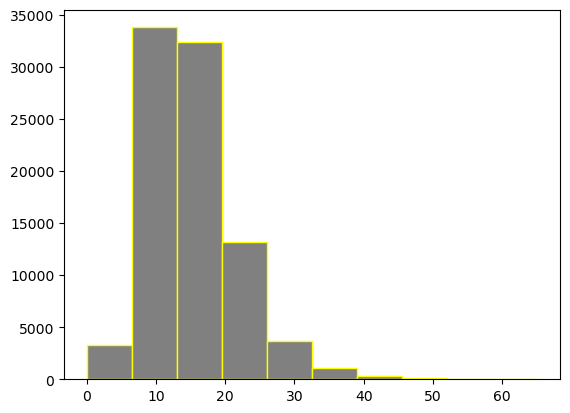

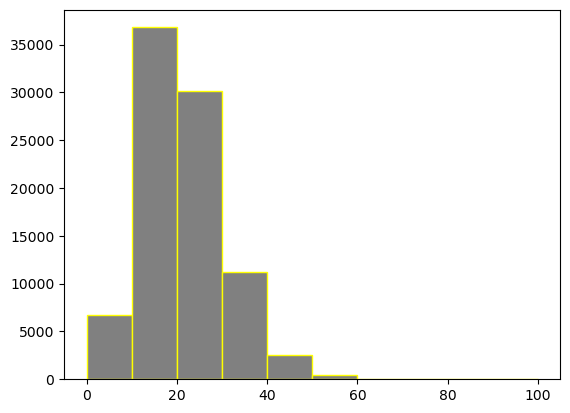

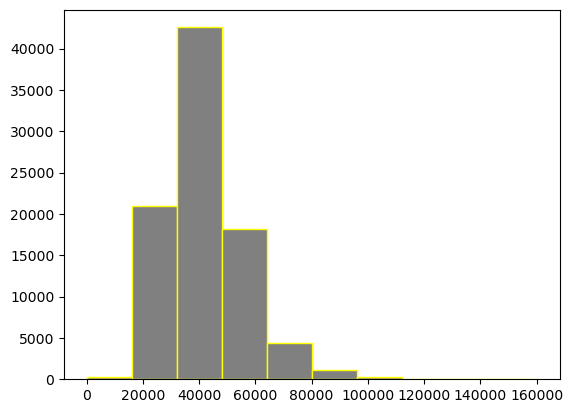

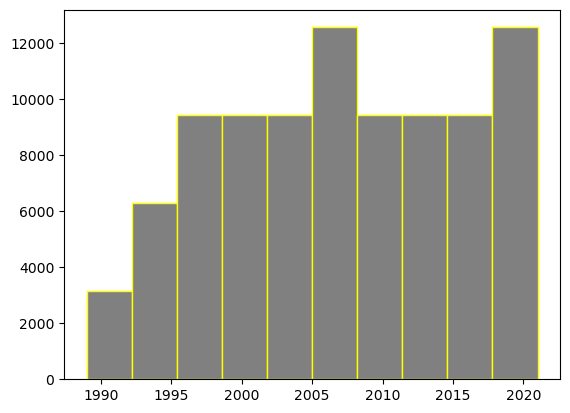

In [ ]:
plt.hist(poverty_county['PR_ALL'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(poverty_county['PR_YOUTH'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(poverty_county['MED_HH_INCOME'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(poverty_county['YEAR'], edgecolor="yellow", color="grey")
plt.show()

In [ ]:
poverty_county

,COUNTY,PR_ALL,PR_YOUTH,MED_HH_INCOME,YEAR
0,Autauga County,14.3,20.2,26898.0,1989
1,Baldwin County,13.2,18.6,24043.0,1989
2,Barbour County,26.2,38.2,18673.0,1989
3,Bibb County,18.9,25.0,19604.0,1989
4,Blount County,13.4,19.4,24035.0,1989
...,...,...,...,...,...
91108,Sweetwater County,9.2,9.7,74677.0,2021
91109,Teton County,5.9,5.5,102709.0,2021
91110,Uinta County,9.4,11.2,70162.0,2021
91111,Washakie County,10.2,12.5,62176.0,2021
